In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

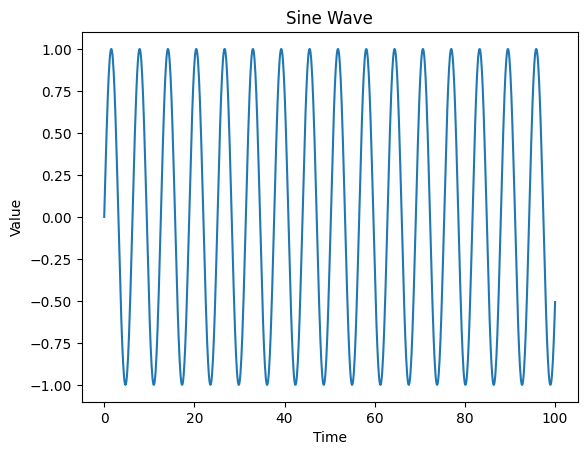

In [2]:
# Generate synthetic sine wave data
t = np.linspace(0, 100, 1000)
data = np.sin(t)
# Plot the data
plt.plot(t, data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Sine Wave')
plt.show()

In [3]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))
# Convert the time series to a supervised learning problem
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        labels.append(data[i+sequence_length])
    return np.array(sequences), np.array(labels)
sequence_length = 50
X, y = create_sequences(data_normalized, sequence_length)

In [4]:
# Reshape input to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
24/24 [==============================] - 7s 89ms/step - loss: 0.1744 - val_loss: 0.0538
Epoch 2/20
24/24 [==============================] - 2s 69ms/step - loss: 0.0216 - val_loss: 0.0033
Epoch 3/20
24/24 [==============================] - 2s 83ms/step - loss: 0.0012 - va

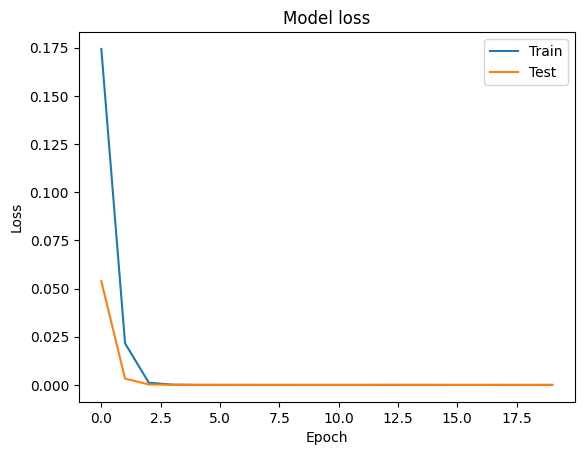

6/6 [==============================] - 1s 17ms/step


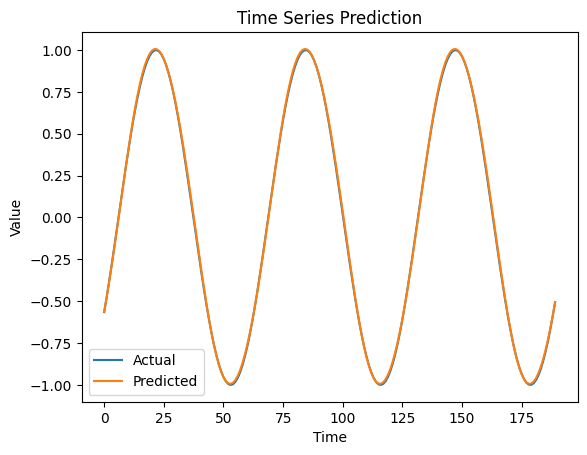

In [6]:
# Summary of the model
model.summary()
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()
# Make predictions
y_pred = model.predict(X_test)
# Inverse transform the predictions and the actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
# Plot the results
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_pred)), y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Prediction')
plt.legend()
plt.show()